1 - Give a brief explaination of the Gradient Descent (GD) method and motivate the introduction of the Stochastic Gradient Descent (SGD)


The Gradient Descent method is an iterative optimization algorithm, used in the machine learning setting to minimize a cost or MSE function, by adjusting some parameters of the function.

The optimization is performed by correcting the position of the current solution in the hyper-space of the paramters by moving in the opposite direction of the gradient of the cost or MSE function, which is the direction of maximum change of the function (this is why we move in the opposite direction of the gradient).

The step size in this direction is determined by a hyper-parameter called learning rate, which controls the magnitude of the update. This hyper-parameter is of paramaount importance in order to ensure the convergence of the method.

This is performed until a stopping criterion is met (either a maximum number of steps, or if a desired tolerance is met either of the residuals or between consecutive steps)


The Stochastic Gradient Descent (SGD) has been introduced to speed up the computaton of the gradient of the cost/MSE function, by computing it only on a random subset of the samples, instead of computing in on the whole dataset.

There are many ways to choose the subset of samples: only one sample can be used, or a minibatch of the whole set (SGD with minibatch).


In [2]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [3]:
m = 100
noise = 1.0
coeff_exact = np.array([5.0, 1.0])
np.random.seed(0)
X = np.c_[[1] * 100, 13.5 * np.random.rand(m, 1)]
y = X @ coeff_exact + noise * np.random.randn(m)

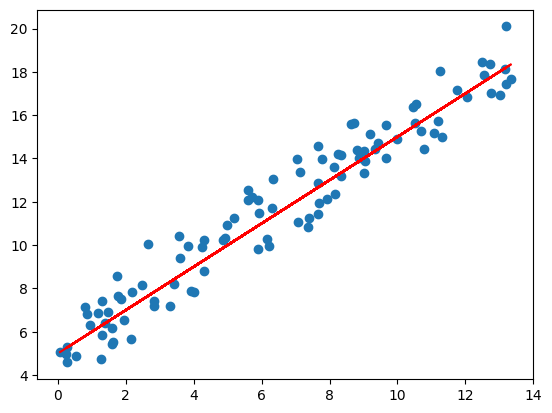

In [4]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], X @ coeff_exact, color="red")

In [5]:
def MSE(x, y, params):
    return jnp.sqrt(jnp.sum(jnp.square(y - x @ params)))


grad_jit = jax.jit(jax.grad(MSE, argnums=2))
MSE_jit = jax.jit(MSE)

By using a constan learning rate.


In [8]:
np.random.seed(0)
params = np.random.randn(2)

max_epochs = 5000
learning_rate = 0.01
batch_size = 10

for epoch in range(max_epochs):
    batch_idxs = np.random.choice(m, batch_size)
    grads = grad_jit(X[batch_idxs, :], y[batch_idxs], params)
    params -= learning_rate * grads

params

Array([5.2435536, 0.9917946], dtype=float32)

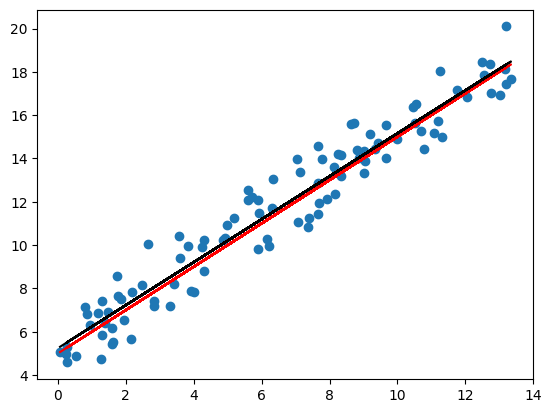

In [9]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], X @ coeff_exact, color="red")
plt.plot(X[:, 1], X @ params, color="black")

Trying the scikit-learn function.


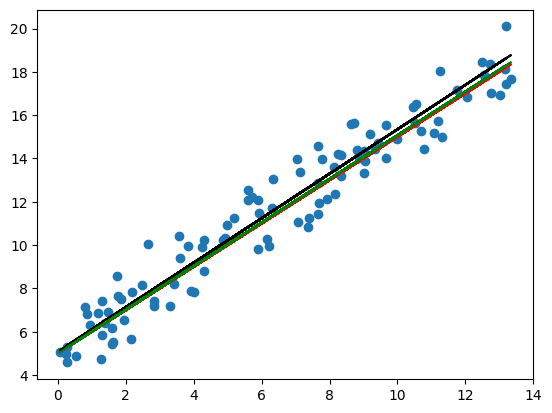

In [8]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor()
reg.fit(X, y)

y_pred = reg.predict(X)

plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], X @ coeff_exact, color="red")
plt.plot(X[:, 1], X @ params, color="black")
plt.plot(X[:, 1], y_pred, color="green")

By adding a dynamic learning rate.


In [23]:
np.random.seed(0)
params = np.random.randn(2)

max_epochs = 4000
learning_rate_max = 0.1
learning_rate_min = 0.0001
learning_rate_decay = 3000
batch_size = 10

for epoch in range(max_epochs):
    learning_rate = max(
        learning_rate_min, learning_rate_max * (1 - epoch / learning_rate_decay)
    )
    batch_idxs = np.random.choice(m, batch_size)
    grads = grad_jit(X[batch_idxs, :], y[batch_idxs], params)
    params -= learning_rate * grads

params

Array([5.187026 , 0.9988012], dtype=float32)

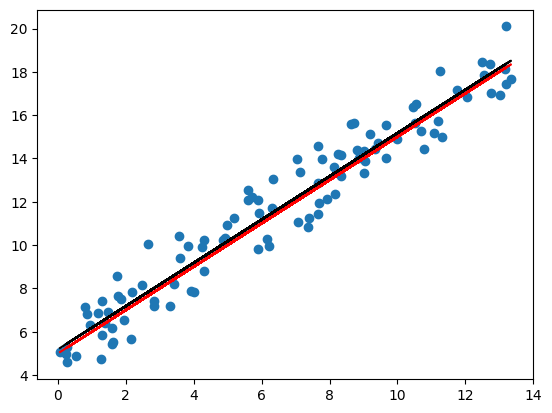

In [24]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], X @ coeff_exact, color="red")
plt.plot(X[:, 1], X @ params, color="black")

Adding momentum to the SGD.


In [29]:
np.random.seed(0)
params = np.random.randn(2)

max_epochs = 4000
learning_rate_max = 0.1
learning_rate_min = 0.0001
learning_rate_decay = 3000
batch_size = 10
alpha = 0.9

v = np.zeros(params.shape)
for epoch in range(max_epochs):
    learning_rate = max(
        learning_rate_min, learning_rate_max * (1 - epoch / learning_rate_decay)
    )
    batch_idxs = np.random.choice(m, batch_size)
    grads = grad_jit(X[batch_idxs, :], y[batch_idxs], params)
    v = alpha * v - learning_rate * grads
    params += v

params

Array([5.2576103, 1.0018837], dtype=float32)

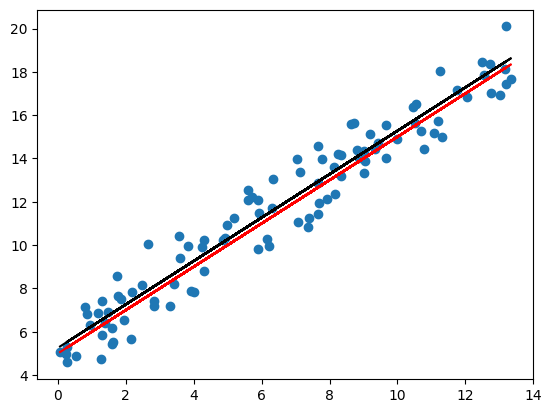

In [30]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], X @ coeff_exact, color="red")
plt.plot(X[:, 1], X @ params, color="black")